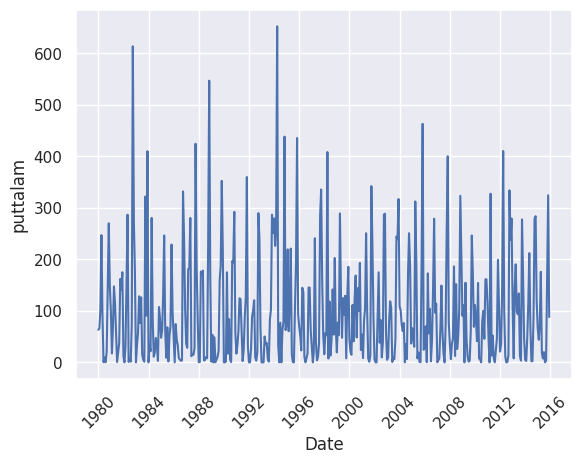

In [30]:
# Autoregressive Moving Average model

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import datetime

weather = pd.read_csv("climatedatawithdate.csv")

weather.index = pd.to_datetime(weather['date'])

sns.set()

plt.ylabel('puttalam')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.plot(weather.index, weather['puttalam'], )

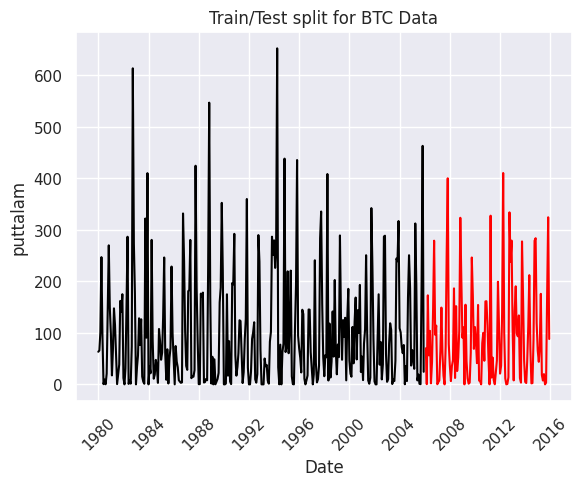

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

weather['date'] = pd.to_datetime(weather['date'])  # Convert 'Date' column to DateTime format

train = weather[weather['date'] < pd.to_datetime("1/1/2006")]
test = weather[weather['date'] > pd.to_datetime("1/1/2006")]

plt.plot(train['date'], train['puttalam'], color="black")
plt.plot(test['date'], test['puttalam'], color="red")
plt.ylabel('puttalam')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


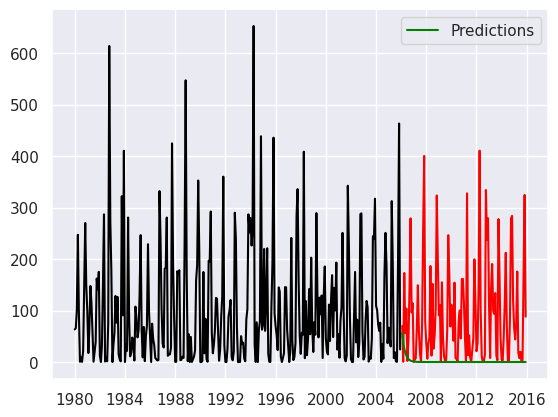

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['puttalam']

ARMAmodel = SARIMAX(y, order = (1, 0, 1))

ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train['date'], train['puttalam'], color="black")
plt.plot(test['date'], test['puttalam'], color="red")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["puttalam"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  135.04164220645794


In [34]:
puttalam_range = train['puttalam'].max() - train['puttalam'].min()
puttalam_range

652.6